In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
pd.set_option('display.max_columns',250) #for displaying all the column value


# Converting CSV to DataFrame


In [6]:
column_names = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

df = pd.read_csv('network_intrusion_data.csv',encoding = 'ISO-8859-1',header=None,names=column_names)


In [7]:
df[:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
df.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [9]:
df.shape

(494021, 42)

In [10]:
df_clean = df.dropna() #drop any null value row

In [11]:
df_clean.shape

(494021, 42)

In [12]:
df_unique = df_clean.drop_duplicates(keep='first', inplace=False) #removing dulicates

In [13]:
df_unique.shape

(145586, 42)

In [14]:
def binary_label_encoding(label):
    if label=='normal.':
        return 0
    else:
        return 1
    

In [15]:
df_unique['binary_label']=df_unique.outcome.apply(binary_label_encoding)

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_unique.shape

(145586, 43)

In [17]:
y_binary = df_unique['binary_label'].tolist()

In [18]:
y_binary = np.array(y_binary)

In [19]:
y_binary.shape

(145586,)

In [20]:
y_binary

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
outcome_list = df_unique['outcome'].tolist()

In [23]:
len(outcome_list)

145586

In [24]:
y_multilabel = le.fit_transform(outcome_list)

In [25]:
le.classes_

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype='<U16')

In [26]:
y_multilabel[1:5000]

array([11, 11, 11, ..., 11, 11, 11], dtype=int64)

In [27]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [28]:
def min_max_normalization(df,name):
    
    max_value = df[name].max()
    min_value = df[name].min()
    
    new_column = "{}_{}".format('normalized',name)
    
    df[new_column] = (df[name] - min_value) / (max_value - min_value)
    df.drop(name,axis=1,inplace = True)   
            

In [29]:
encode_text_dummy(df_unique,'protocol_type')

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
df_unique.shape

(145586, 45)

In [31]:
encode_text_dummy(df_unique,'service')

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
df_unique.shape

(145586, 110)

In [33]:
encode_text_dummy(df_unique,'flag')

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
df_unique.shape

(145586, 120)

In [35]:
encode_text_dummy(df_unique,'su_attempted')

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
df_unique.shape

(145586, 122)

In [37]:
df_unique[:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [38]:
numerical_features = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','num_root','num_file_creations','num_shells','num_access_files','count',
'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

In [39]:
df_unique.shape

(145586, 122)

In [40]:
for name in numerical_features:
    min_max_normalization(df_unique,name)
    

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
df_unique.shape

(145586, 122)

In [42]:
df_unique[:5]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,outcome,binary_label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,normal.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [43]:
del df_unique['is_host_login']

In [44]:
df_unique.shape

(145586, 121)

In [45]:
del df_unique['num_outbound_cmds']

In [46]:
df_unique.shape

(145586, 120)

In [47]:
df_outcome = df_unique[['outcome','binary_label']]

In [48]:
df_outcome.shape

(145586, 2)

In [49]:
df_unique.shape

(145586, 120)

In [50]:
del df_unique['outcome']


In [51]:
del df_unique['binary_label']

In [52]:
df_unique.shape

(145586, 118)

In [53]:
df_unique[:5]

,land,logged_in,root_shell,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [54]:
X=df_unique.as_matrix(columns=None)

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [55]:
X.shape

(145586, 118)

In [56]:
y_binary.shape

(145586,)

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_binary,test_size=0.20,random_state=1)

# Train Models

In [58]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train,y_train)

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation

In [65]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[17463    96]
 [  367 11192]]

Precision Score::  0.9914953933380581
Recall Score::     0.9682498486028203
F1 Score::         0.9797347572985513

Plotting confusion matrix


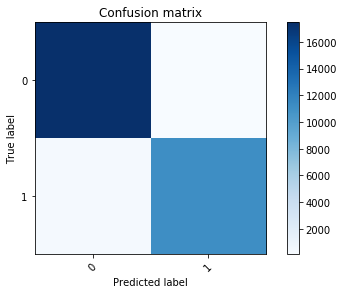


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17559
           1       0.99      0.97      0.98     11559

   micro avg       0.98      0.98      0.98     29118
   macro avg       0.99      0.98      0.98     29118
weighted avg       0.98      0.98      0.98     29118



In [69]:
y_pred_svm = clf_svc.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_svm[:10])

print()

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm))   
print("Recall Score::    ",metrics.recall_score(y_test,y_pred_svm))      
print("F1 Score::        ",metrics.f1_score(y_test,y_pred_svm)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_svm, clf_svc.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_svm))

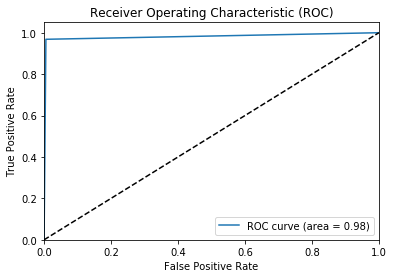

In [138]:
plot_roc(y_pred_svm,y_test)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[17536    23]
 [   32 11527]]

Precision Score::  0.998008658008658
Recall Score   ::  0.9972315944285838
F1 Score       ::  0.9976199749015536

Plotting confusion matrix


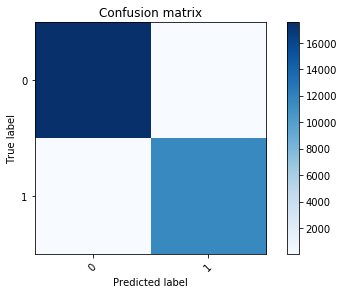


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [70]:
y_pred_knn = clf_knn.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_knn[:10])

print()

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_knn))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_knn)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_knn, clf_knn.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_knn))


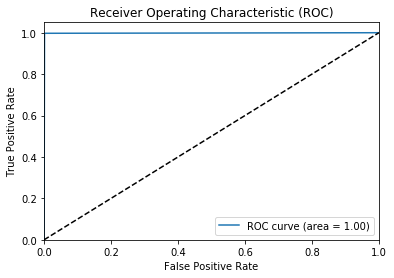

In [139]:
plot_roc(y_pred_knn,y_test)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 1 0 1 0 1 0 0 0 1]

[[17451   108]
 [  272 11287]]

Precision Score::  0.9905221588415972
Recall Score   ::  0.9764685526429622
F1 Score       ::  0.9834451511719091

Plotting confusion matrix


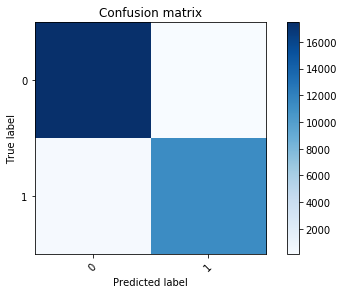


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17559
           1       0.99      0.98      0.98     11559

   micro avg       0.99      0.99      0.99     29118
   macro avg       0.99      0.99      0.99     29118
weighted avg       0.99      0.99      0.99     29118



In [72]:
y_pred_lr = clf_lr.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])

print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_lr))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_lr))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_lr)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_lr, clf_lr.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

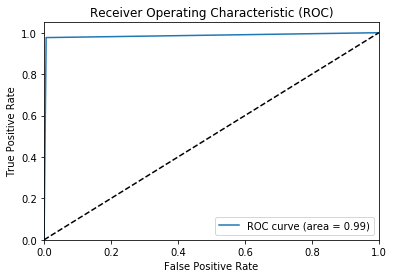

In [140]:
plot_roc(y_pred_lr,y_test)

test :  [0 1 0 1 0 1 0 0 0 1]
pred :  [0 0 0 1 0 1 0 0 0 1]

[[17508    51]
 [ 2325  9234]]

Precision Score::  0.9945072697899838
Recall Score   ::  0.7988580327017908
F1 Score       ::  0.8860103626943006

Plotting confusion matrix


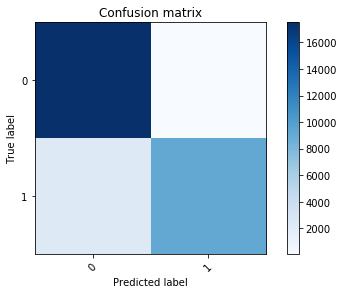


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17559
           1       0.99      0.80      0.89     11559

   micro avg       0.92      0.92      0.92     29118
   macro avg       0.94      0.90      0.91     29118
weighted avg       0.93      0.92      0.92     29118



In [73]:
y_pred_gnb = clf_gnb.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_gnb[:10])

print()

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_gnb))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_gnb))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_gnb)) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_gnb, clf_gnb.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_gnb))

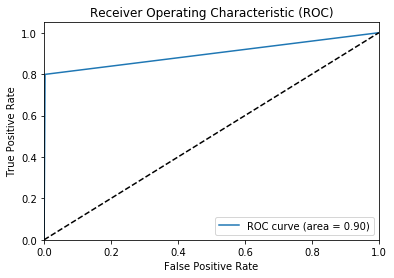

In [141]:
plot_roc(y_pred_gnb,y_test)

# Neural Network model

In [74]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [75]:
# columns
columns_new = ['y']

# pass in array and columns
dataframe_y = pd.DataFrame(y_binary , columns=columns_new)

In [76]:
encode_text_dummy(dataframe_y,'y')

In [77]:
y_tns_binary = dataframe_y.values

In [78]:
y_tns_binary.shape

(145586, 2)

In [79]:
X_tns_train,X_tns_test,y_tns_train,y_tns_test = train_test_split(X,y_tns_binary,test_size=0.20,random_state=1)

In [80]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(50,activation='relu')) # Hidden 2
    model_classification.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 3s - loss: 0.0308 - val_loss: 0.0143
Epoch 2/1000
 - 3s - loss: 0.0089 - val_loss: 0.0110
Epoch 3/1000
 - 3s - loss: 0.0072 - val_loss: 0.0111
Epoch 4/1000
 - 3s - loss: 0.0065 - val_loss: 0.0082
Epoch 5/1000
 - 3s - loss: 0.0058 - val_loss: 0.0088
Epoch 6/1000
 - 3s - loss: 0.0054 - val_loss: 0.0085
Epoch 7/1000
 - 3s - loss: 0.0049 - val_loss: 0.0087
Epoch 8/1000
 - 3s - loss: 0.0046 - val_loss: 0.0080
Epoch 9/1000
 - 3s - loss: 0.0043 - val_loss: 0.0083
Epoch 00009: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 3s - loss: 0.0333 - val_loss: 0.0156
Epoch 2/1000
 - 3s - loss: 0.0103 - val_loss: 0.0104
Epoch 3/1000
 - 3s - loss: 0.0072 - val_loss: 0.0082
Epoch 4/1000
 - 3s - loss: 0.0065 - val_loss: 0.0100
Epoch 5/1000
 - 3s - loss: 0.0056 - val_loss: 0.0072
Epoch 6/1000
 - 3s - loss: 0.0053 - val_loss: 0.0075
Epoch 7/1000
 - 3s - loss: 0.0046 - val_loss: 0.0073
Epoch 8/1000
 - 3s

Precision score : 0.9984410185345575
Recall score    : 0.9973181071026905
F1 score        : 0.9978792469162518

[[17541    18]
 [   31 11528]]

Plotting confusion matrix


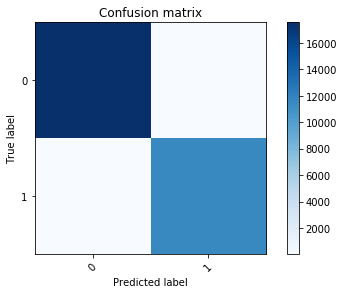

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [82]:
model_classification.load_weights('class_weights/best_weights.hdf5')

pred = model_classification.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

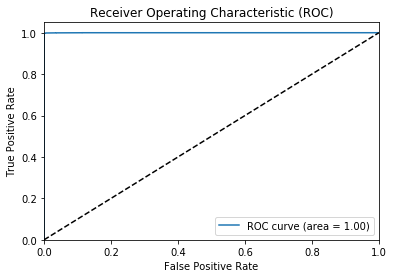

In [83]:
model_classification.load_weights('class_weights/best_weights.hdf5')

pred = model_classification.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)


In [84]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_1 = Sequential()
    model_classification_1.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_1.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_1.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_1.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_1.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.0685 - val_loss: 0.0426
Epoch 2/1000
 - 3s - loss: 0.0366 - val_loss: 0.0428
Epoch 3/1000
 - 3s - loss: 0.0335 - val_loss: 0.0371
Epoch 4/1000
 - 3s - loss: 0.0310 - val_loss: 0.0375
Epoch 5/1000
 - 3s - loss: 0.0288 - val_loss: 0.0311
Epoch 6/1000
 - 4s - loss: 0.0268 - val_loss: 0.0287
Epoch 7/1000
 - 3s - loss: 0.0245 - val_loss: 0.0305
Epoch 8/1000
 - 3s - loss: 0.0222 - val_loss: 0.0240
Epoch 9/1000
 - 3s - loss: 0.0197 - val_loss: 0.0226
Epoch 10/1000
 - 3s - loss: 0.0173 - val_loss: 0.0191
Epoch 11/1000
 - 4s - loss: 0.0148 - val_loss: 0.0196
Epoch 12/1000
 - 3s - loss: 0.0127 - val_loss: 0.0214
Epoch 13/1000
 - 3s - loss: 0.0114 - val_loss: 0.0147
Epoch 14/1000
 - 3s - loss: 0.0103 - val_loss: 0.0130
Epoch 15/1000
 - 3s - loss: 0.0098 - val_loss: 0.0122
Epoch 16/1000
 - 3s - loss: 0.0090 - val_loss: 0.0115
Epoch 17/1000
 - 3s - loss: 0.0086 - val_loss: 0.0113
Epoch 18/1000
 - 3s - loss: 0.0083 - v

Precision score : 0.998267348176384
Recall score    : 0.9968855437321568
F1 score        : 0.9975759674487057

[[17539    20]
 [   36 11523]]

Plotting confusion matrix


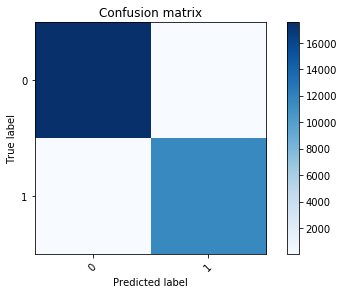

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [85]:
model_classification_1.load_weights('class_weights/best_weights_1.hdf5')

pred = model_classification_1.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

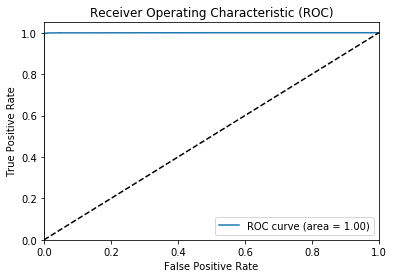

In [86]:
model_classification_1.load_weights('class_weights/best_weights_1.hdf5')

pred = model_classification_1.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [87]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_2 = Sequential()
    model_classification_2.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_2.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_2.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_2.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_2.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.0421 - val_loss: 0.0332
Epoch 2/1000
 - 4s - loss: 0.0231 - val_loss: 0.0199
Epoch 3/1000
 - 3s - loss: 0.0119 - val_loss: 0.0116
Epoch 4/1000
 - 3s - loss: 0.0092 - val_loss: 0.0099
Epoch 5/1000
 - 3s - loss: 0.0079 - val_loss: 0.0094
Epoch 6/1000
 - 4s - loss: 0.0071 - val_loss: 0.0092
Epoch 7/1000
 - 3s - loss: 0.0065 - val_loss: 0.0106
Epoch 8/1000
 - 3s - loss: 0.0064 - val_loss: 0.0094
Epoch 9/1000
 - 4s - loss: 0.0060 - val_loss: 0.0087
Epoch 10/1000
 - 4s - loss: 0.0059 - val_loss: 0.0083
Epoch 11/1000
 - 4s - loss: 0.0055 - val_loss: 0.0078
Epoch 12/1000
 - 3s - loss: 0.0053 - val_loss: 0.0085
Epoch 13/1000
 - 3s - loss: 0.0052 - val_loss: 0.0083
Epoch 14/1000
 - 3s - loss: 0.0049 - val_loss: 0.0122
Epoch 00014: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.0437 - val_loss: 0.0310
Epoch 2/1000
 - 3s - loss: 0.0223 - val_loss: 0.0169
Epoch 3/1000


Precision score : 0.998700511132288
Recall score    : 0.9973181071026905
F1 score        : 0.9980088304042939

[[17544    15]
 [   31 11528]]

Plotting confusion matrix


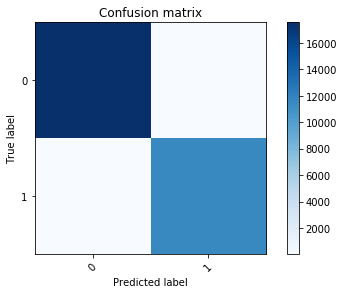

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [88]:
model_classification_2.load_weights('class_weights/best_weights_2.hdf5')

pred = model_classification_2.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

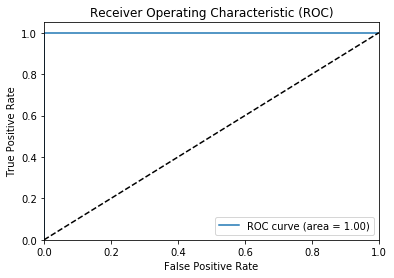

In [89]:
model_classification_2.load_weights('class_weights/best_weights_2.hdf5')

pred = model_classification_2.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [90]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_3 = Sequential()
    model_classification_3.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_3.add(Dense(50,activation='relu')) # Hidden 2
    model_classification_3.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_3.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_3.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.0877 - val_loss: 0.0596
Epoch 2/1000
 - 3s - loss: 0.0480 - val_loss: 0.0470
Epoch 3/1000
 - 4s - loss: 0.0399 - val_loss: 0.0411
Epoch 4/1000
 - 4s - loss: 0.0356 - val_loss: 0.0408
Epoch 5/1000
 - 4s - loss: 0.0328 - val_loss: 0.0358
Epoch 6/1000
 - 3s - loss: 0.0306 - val_loss: 0.0326
Epoch 7/1000
 - 4s - loss: 0.0287 - val_loss: 0.0310
Epoch 8/1000
 - 4s - loss: 0.0272 - val_loss: 0.0323
Epoch 9/1000
 - 4s - loss: 0.0258 - val_loss: 0.0313
Epoch 10/1000
 - 4s - loss: 0.0246 - val_loss: 0.0275
Epoch 11/1000
 - 3s - loss: 0.0235 - val_loss: 0.0272
Epoch 12/1000
 - 3s - loss: 0.0226 - val_loss: 0.0249
Epoch 13/1000
 - 4s - loss: 0.0217 - val_loss: 0.0293
Epoch 14/1000
 - 4s - loss: 0.0208 - val_loss: 0.0231
Epoch 15/1000
 - 3s - loss: 0.0201 - val_loss: 0.0227
Epoch 16/1000
 - 3s - loss: 0.0194 - val_loss: 0.0224
Epoch 17/1000
 - 3s - loss: 0.0188 - val_loss: 0.0212
Epoch 18/1000
 - 4s - loss: 0.0180 - v

Epoch 19/1000
 - 4s - loss: 0.0173 - val_loss: 0.0195
Epoch 20/1000
 - 3s - loss: 0.0166 - val_loss: 0.0189
Epoch 21/1000
 - 4s - loss: 0.0161 - val_loss: 0.0187
Epoch 22/1000
 - 3s - loss: 0.0154 - val_loss: 0.0184
Epoch 23/1000
 - 4s - loss: 0.0149 - val_loss: 0.0168
Epoch 24/1000
 - 3s - loss: 0.0143 - val_loss: 0.0173
Epoch 25/1000
 - 4s - loss: 0.0138 - val_loss: 0.0162
Epoch 26/1000
 - 4s - loss: 0.0134 - val_loss: 0.0157
Epoch 27/1000
 - 4s - loss: 0.0129 - val_loss: 0.0148
Epoch 28/1000
 - 4s - loss: 0.0124 - val_loss: 0.0146
Epoch 29/1000
 - 4s - loss: 0.0120 - val_loss: 0.0141
Epoch 30/1000
 - 4s - loss: 0.0116 - val_loss: 0.0163
Epoch 31/1000
 - 4s - loss: 0.0111 - val_loss: 0.0140
Epoch 32/1000
 - 4s - loss: 0.0108 - val_loss: 0.0142
Epoch 33/1000
 - 3s - loss: 0.0103 - val_loss: 0.0126
Epoch 34/1000
 - 4s - loss: 0.0099 - val_loss: 0.0118
Epoch 35/1000
 - 4s - loss: 0.0096 - val_loss: 0.0120
Epoch 36/1000
 - 4s - loss: 0.0092 - val_loss: 0.0122
Epoch 37/1000
 - 3s - loss: 

Precision score : 0.998093917865188
Recall score    : 0.9966260057098365
F1 score        : 0.9973594216700576

[[17537    22]
 [   39 11520]]

Plotting confusion matrix


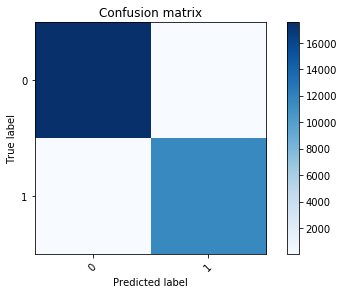

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [91]:
model_classification_3.load_weights('class_weights/best_weights_3.hdf5')

pred = model_classification_3.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

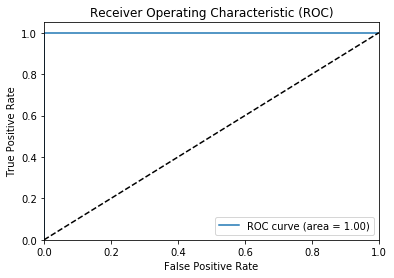

In [92]:
model_classification_3.load_weights('class_weights/best_weights_3.hdf5')

pred = model_classification_3.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [93]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_4 = Sequential()
    model_classification_4.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_4.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_4.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_4.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_4.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.3623 - val_loss: 0.1268
Epoch 2/1000
 - 4s - loss: 0.1091 - val_loss: 0.1030
Epoch 3/1000
 - 3s - loss: 0.0927 - val_loss: 0.0907
Epoch 4/1000
 - 3s - loss: 0.0812 - val_loss: 0.0813
Epoch 5/1000
 - 5s - loss: 0.0734 - val_loss: 0.0756
Epoch 6/1000
 - 4s - loss: 0.0679 - val_loss: 0.0707
Epoch 7/1000
 - 4s - loss: 0.0638 - val_loss: 0.0670
Epoch 8/1000
 - 4s - loss: 0.0605 - val_loss: 0.0643
Epoch 9/1000
 - 4s - loss: 0.0578 - val_loss: 0.0613
Epoch 10/1000
 - 3s - loss: 0.0555 - val_loss: 0.0588
Epoch 11/1000
 - 3s - loss: 0.0534 - val_loss: 0.0567
Epoch 12/1000
 - 3s - loss: 0.0517 - val_loss: 0.0550
Epoch 13/1000
 - 3s - loss: 0.0501 - val_loss: 0.0536
Epoch 14/1000
 - 4s - loss: 0.0488 - val_loss: 0.0522
Epoch 15/1000
 - 3s - loss: 0.0476 - val_loss: 0.0513
Epoch 16/1000
 - 3s - loss: 0.0464 - val_loss: 0.0502
Epoch 17/1000
 - 4s - loss: 0.0456 - val_loss: 0.0492
Epoch 18/1000
 - 4s - loss: 0.0448 - v

Epoch 37/1000
 - 4s - loss: 0.0376 - val_loss: 0.0415
Epoch 00037: early stopping
4
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 4s - loss: 0.3537 - val_loss: 0.1307
Epoch 2/1000
 - 3s - loss: 0.1141 - val_loss: 0.1080
Epoch 3/1000
 - 4s - loss: 0.0977 - val_loss: 0.0947
Epoch 4/1000
 - 3s - loss: 0.0852 - val_loss: 0.0847
Epoch 5/1000
 - 3s - loss: 0.0761 - val_loss: 0.0773
Epoch 6/1000
 - 4s - loss: 0.0698 - val_loss: 0.0722
Epoch 7/1000
 - 4s - loss: 0.0652 - val_loss: 0.0682
Epoch 8/1000
 - 4s - loss: 0.0617 - val_loss: 0.0649
Epoch 9/1000
 - 4s - loss: 0.0587 - val_loss: 0.0625
Epoch 10/1000
 - 4s - loss: 0.0563 - val_loss: 0.0597
Epoch 11/1000
 - 3s - loss: 0.0542 - val_loss: 0.0577
Epoch 12/1000
 - 4s - loss: 0.0523 - val_loss: 0.0562
Epoch 13/1000
 - 3s - loss: 0.0507 - val_loss: 0.0543
Epoch 14/1000
 - 3s - loss: 0.0493 - val_loss: 0.0529
Epoch 15/1000
 - 3s - loss: 0.0481 - val_loss: 0.0517
Epoch 16/1000
 - 3s - loss: 0.0470 - val_loss: 0.0504
Epoch 17/1

Precision score : 0.989640035118525
Recall score    : 0.9751708625313609
F1 score        : 0.9823521722079394

[[17441   118]
 [  287 11272]]

Plotting confusion matrix


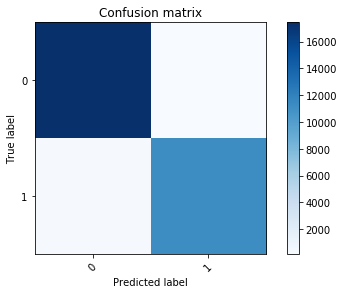

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17559
           1       0.99      0.98      0.98     11559

   micro avg       0.99      0.99      0.99     29118
   macro avg       0.99      0.98      0.99     29118
weighted avg       0.99      0.99      0.99     29118



In [94]:
model_classification_4.load_weights('class_weights/best_weights_4.hdf5')

pred = model_classification_4.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

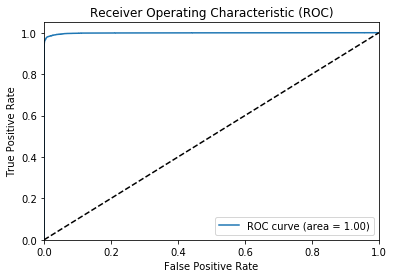

In [95]:
model_classification_4.load_weights('class_weights/best_weights_4.hdf5')

pred = model_classification_4.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [96]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_5 = Sequential()
    model_classification_5.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_5.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_5.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_5.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_5.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0872 - val_loss: 0.0633
Epoch 2/1000
 - 5s - loss: 0.0519 - val_loss: 0.0530
Epoch 3/1000
 - 3s - loss: 0.0442 - val_loss: 0.0455
Epoch 4/1000
 - 4s - loss: 0.0407 - val_loss: 0.0430
Epoch 5/1000
 - 3s - loss: 0.0388 - val_loss: 0.0414
Epoch 6/1000
 - 4s - loss: 0.0375 - val_loss: 0.0402
Epoch 7/1000
 - 4s - loss: 0.0365 - val_loss: 0.0391
Epoch 8/1000
 - 4s - loss: 0.0356 - val_loss: 0.0380
Epoch 9/1000
 - 4s - loss: 0.0347 - val_loss: 0.0376
Epoch 10/1000
 - 4s - loss: 0.0339 - val_loss: 0.0383
Epoch 11/1000
 - 4s - loss: 0.0332 - val_loss: 0.0370
Epoch 12/1000
 - 4s - loss: 0.0324 - val_loss: 0.0350
Epoch 13/1000
 - 4s - loss: 0.0315 - val_loss: 0.0342
Epoch 14/1000
 - 4s - loss: 0.0307 - val_loss: 0.0330
Epoch 15/1000
 - 4s - loss: 0.0298 - val_loss: 0.0329
Epoch 16/1000
 - 3s - loss: 0.0288 - val_loss: 0.0322
Epoch 17/1000
 - 4s - loss: 0.0281 - val_loss: 0.0309
Epoch 18/1000
 - 3s - loss: 0.0272 - v

 - 3s - loss: 0.0137 - val_loss: 0.0182
Epoch 40/1000
 - 4s - loss: 0.0134 - val_loss: 0.0157
Epoch 41/1000
 - 4s - loss: 0.0130 - val_loss: 0.0150
Epoch 42/1000
 - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 43/1000
 - 3s - loss: 0.0121 - val_loss: 0.0141
Epoch 44/1000
 - 4s - loss: 0.0118 - val_loss: 0.0136
Epoch 45/1000
 - 4s - loss: 0.0115 - val_loss: 0.0132
Epoch 46/1000
 - 4s - loss: 0.0113 - val_loss: 0.0131
Epoch 47/1000
 - 4s - loss: 0.0109 - val_loss: 0.0148
Epoch 48/1000
 - 4s - loss: 0.0107 - val_loss: 0.0160
Epoch 00048: early stopping
3
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0887 - val_loss: 0.0625
Epoch 2/1000
 - 4s - loss: 0.0513 - val_loss: 0.0504
Epoch 3/1000
 - 4s - loss: 0.0438 - val_loss: 0.0455
Epoch 4/1000
 - 4s - loss: 0.0403 - val_loss: 0.0431
Epoch 5/1000
 - 4s - loss: 0.0382 - val_loss: 0.0407
Epoch 6/1000
 - 4s - loss: 0.0366 - val_loss: 0.0389
Epoch 7/1000
 - 4s - loss: 0.0353 - val_loss: 0.0378
Epoch 8/1000
 - 4s - l

Precision score : 0.9976605146867689
Recall score    : 0.996106929665196
F1 score        : 0.9968831168831168

[[17532    27]
 [   45 11514]]

Plotting confusion matrix


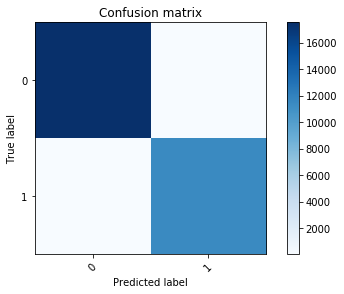

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [97]:
model_classification_5.load_weights('class_weights/best_weights_5.hdf5')

pred = model_classification_5.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

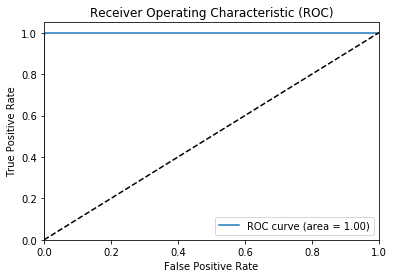

In [98]:
model_classification_5.load_weights('class_weights/best_weights_5.hdf5')

pred = model_classification_5.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [99]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_6 = Sequential()
    model_classification_6.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_6.add(Dense(50,activation='relu')) # Hidden 2
    model_classification_6.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_6.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_6.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0296 - val_loss: 0.0191
Epoch 2/1000
 - 4s - loss: 0.0146 - val_loss: 0.0135
Epoch 3/1000
 - 4s - loss: 0.0134 - val_loss: 0.0140
Epoch 4/1000
 - 4s - loss: 0.0136 - val_loss: 0.0128
Epoch 5/1000
 - 4s - loss: 0.0131 - val_loss: 0.0153
Epoch 6/1000
 - 4s - loss: 0.0127 - val_loss: 0.0157
Epoch 7/1000
 - 4s - loss: 0.0132 - val_loss: 0.0154
Epoch 00007: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0331 - val_loss: 0.0170
Epoch 2/1000
 - 4s - loss: 0.0154 - val_loss: 0.0146
Epoch 3/1000
 - 4s - loss: 0.0135 - val_loss: 0.0149
Epoch 4/1000
 - 4s - loss: 0.0139 - val_loss: 0.0141
Epoch 5/1000
 - 4s - loss: 0.0137 - val_loss: 0.0151
Epoch 6/1000
 - 5s - loss: 0.0135 - val_loss: 0.0152
Epoch 7/1000
 - 4s - loss: 0.0134 - val_loss: 0.0193
Epoch 00007: early stopping
2
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0308 - val_los

Precision score : 0.9980919340849956
Recall score    : 0.9955878536205555
F1 score        : 0.9968383212785309

[[17537    22]
 [   51 11508]]

Plotting confusion matrix


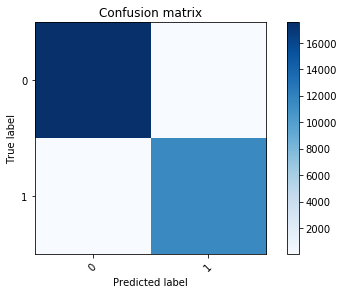

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [100]:
model_classification_6.load_weights('class_weights/best_weights_6.hdf5')

pred = model_classification_6.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

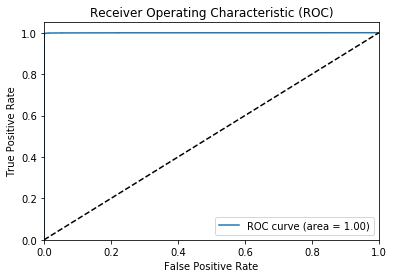

In [101]:
model_classification_6.load_weights('class_weights/best_weights_6.hdf5')

pred = model_classification_6.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [102]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_7.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_7 = Sequential()
    model_classification_7.add(Dense(50,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_7.add(Dense(50,activation='sigmoid')) # Hidden 2
    model_classification_7.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_7.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_7.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 6s - loss: 0.0666 - val_loss: 0.0454
Epoch 2/1000
 - 4s - loss: 0.0404 - val_loss: 0.0453
Epoch 3/1000
 - 4s - loss: 0.0375 - val_loss: 0.0452
Epoch 4/1000
 - 4s - loss: 0.0358 - val_loss: 0.0379
Epoch 5/1000
 - 4s - loss: 0.0345 - val_loss: 0.0354
Epoch 6/1000
 - 4s - loss: 0.0335 - val_loss: 0.0335
Epoch 7/1000
 - 4s - loss: 0.0324 - val_loss: 0.0325
Epoch 8/1000
 - 5s - loss: 0.0294 - val_loss: 0.0285
Epoch 9/1000
 - 4s - loss: 0.0255 - val_loss: 0.0251
Epoch 10/1000
 - 4s - loss: 0.0229 - val_loss: 0.0221
Epoch 11/1000
 - 4s - loss: 0.0206 - val_loss: 0.0210
Epoch 12/1000
 - 4s - loss: 0.0193 - val_loss: 0.0204
Epoch 13/1000
 - 4s - loss: 0.0182 - val_loss: 0.0181
Epoch 14/1000
 - 4s - loss: 0.0168 - val_loss: 0.0174
Epoch 15/1000
 - 4s - loss: 0.0164 - val_loss: 0.0164
Epoch 16/1000
 - 5s - loss: 0.0165 - val_loss: 0.0161
Epoch 17/1000
 - 4s - loss: 0.0160 - val_loss: 0.0165
Epoch 18/1000
 - 4s - loss: 0.0160 - v

Precision score : 0.9954156214860306
Recall score    : 0.9955878536205555
F1 score        : 0.9955017301038063

[[17506    53]
 [   51 11508]]

Plotting confusion matrix


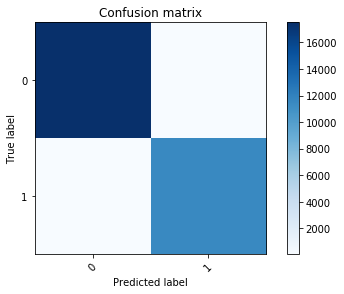

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [103]:
model_classification_7.load_weights('class_weights/best_weights_7.hdf5')

pred = model_classification_7.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

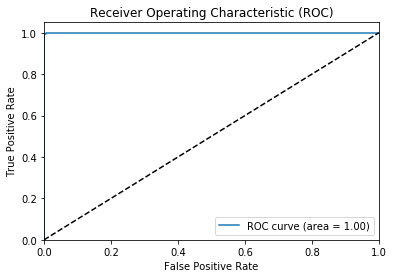

In [104]:
model_classification_7.load_weights('class_weights/best_weights_7.hdf5')

pred = model_classification_7.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [105]:
checkpointer = ModelCheckpoint(filepath="class_weights/best_weights_8.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_classification_8 = Sequential()
    model_classification_8.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_8.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_8.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_8.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_8.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0439 - val_loss: 0.0333
Epoch 2/1000
 - 5s - loss: 0.0234 - val_loss: 0.0184
Epoch 3/1000
 - 6s - loss: 0.0156 - val_loss: 0.0178
Epoch 4/1000
 - 4s - loss: 0.0137 - val_loss: 0.0182
Epoch 5/1000
 - 5s - loss: 0.0131 - val_loss: 0.0125
Epoch 6/1000
 - 5s - loss: 0.0122 - val_loss: 0.0125
Epoch 7/1000
 - 4s - loss: 0.0116 - val_loss: 0.0121
Epoch 8/1000
 - 4s - loss: 0.0108 - val_loss: 0.0115
Epoch 9/1000
 - 5s - loss: 0.0105 - val_loss: 0.0111
Epoch 10/1000
 - 4s - loss: 0.0100 - val_loss: 0.0111
Epoch 11/1000
 - 4s - loss: 0.0097 - val_loss: 0.0114
Epoch 12/1000
 - 5s - loss: 0.0096 - val_loss: 0.0100
Epoch 13/1000
 - 5s - loss: 0.0093 - val_loss: 0.0098
Epoch 14/1000
 - 5s - loss: 0.0093 - val_loss: 0.0105
Epoch 15/1000
 - 4s - loss: 0.0091 - val_loss: 0.0106
Epoch 16/1000
 - 4s - loss: 0.0091 - val_loss: 0.0104
Epoch 17/1000
 - 4s - loss: 0.0091 - val_loss: 0.0098
Epoch 00017: early stopping
1
Train on

Precision score : 0.9986127969481533
Recall score    : 0.996452980361623
F1 score        : 0.9975317195687003

[[17543    16]
 [   41 11518]]

Plotting confusion matrix


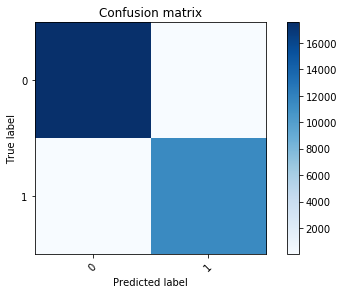

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [106]:
model_classification_8.load_weights('class_weights/best_weights_8.hdf5')

pred = model_classification_8.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(classification_report(y_true, pred))

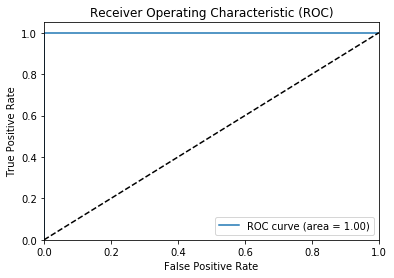

In [107]:
model_classification_8.load_weights('class_weights/best_weights_8.hdf5')

pred = model_classification_8.predict(X_tns_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# CNN

In [108]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

In [109]:
X_tns_re_train = X_tns_train.reshape(X_tns_train.shape[0], 1, X_tns_train.shape[1], 1)
X_tns_re_test = X_tns_test.reshape(X_tns_test.shape[0], 1, X_tns_test.shape[1], 1)

In [110]:
input_shape=(1,X_tns_train.shape[1],1)

In [111]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1),activation='relu',input_shape=input_shape,padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 118, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 59, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 59, 64)         6208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 500)               960500    
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 1002      
Total para

In [112]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model.fit(X_tns_re_train[0:5000], y_tns_train[0:5000],batch_size=128,validation_data=(X_tns_re_test[0:1000],y_tns_test[0:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 86s - loss: 0.1417 - val_loss: 0.0995
Epoch 2/1000
 - 85s - loss: 0.0584 - val_loss: 0.0775
Epoch 3/1000
 - 85s - loss: 0.0475 - val_loss: 0.0765
Epoch 4/1000
 - 86s - loss: 0.0436 - val_loss: 0.0615
Epoch 5/1000
 - 88s - loss: 0.0365 - val_loss: 0.0604
Epoch 6/1000
 - 86s - loss: 0.0314 - val_loss: 0.0563
Epoch 7/1000
 - 81s - loss: 0.0274 - val_loss: 0.0433
Epoch 8/1000
 - 81s - loss: 0.0245 - val_loss: 0.0385
Epoch 9/1000
 - 85s - loss: 0.0241 - val_loss: 0.0400
Epoch 10/1000
 - 82s - loss: 0.0199 - val_loss: 0.0300
Epoch 11/1000
 - 80s - loss: 0.0195 - val_loss: 0.0407
Epoch 12/1000
 - 82s - loss: 0.0144 - val_loss: 0.0236
Epoch 13/1000
 - 88s - loss: 0.0137 - val_loss: 0.0275
Epoch 14/1000
 - 97s - loss: 0.0116 - val_loss: 0.0246
Epoch 00014: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 93s - loss: 0.0199 - val_loss: 0.0293
Epoch 2/1000
 - 88s - loss: 0.0212 - val_loss: 0.0249
Epo

Precision score : 0.9964483714483714
Recall score    : 0.9951552902500216
F1 score        : 0.995801411072155

[[17518    41]
 [   56 11503]]

Plotting confusion matrix


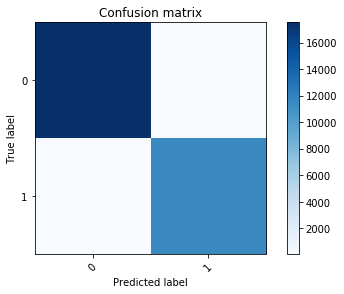

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [113]:
cnn_model.load_weights('cnn_weights/best_weights.hdf5')

pred = cnn_model.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

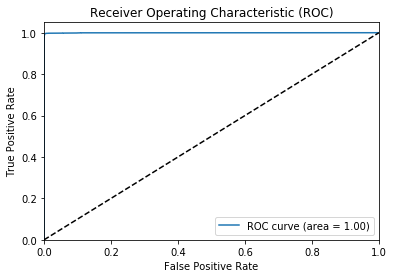

In [114]:
cnn_model.load_weights('cnn_weights/best_weights.hdf5')

pred = cnn_model.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [115]:
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',input_shape=input_shape,padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(500, activation='sigmoid'))
cnn_model_1.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 118, 32)        192       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 59, 32)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 59, 64)         10304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_138 (Dense)            (None, 500)               960500    
_________________________________________________________________
dense_139 (Dense)            (None, 2)                 1002      
Total para

In [117]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_1.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=1, mode='auto')
    cnn_model_1.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 89s - loss: 0.2003 - val_loss: 0.1384
Epoch 2/1000
 - 84s - loss: 0.1115 - val_loss: 0.1334
Epoch 3/1000
 - 84s - loss: 0.0991 - val_loss: 0.1274
Epoch 4/1000
 - 85s - loss: 0.0949 - val_loss: 0.1223
Epoch 5/1000
 - 82s - loss: 0.0882 - val_loss: 0.1160
Epoch 6/1000
 - 83s - loss: 0.0893 - val_loss: 0.1266
Epoch 7/1000
 - 90s - loss: 0.0818 - val_loss: 0.1136
Epoch 00007: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 100s - loss: 0.0925 - val_loss: 0.1114
Epoch 2/1000
 - 98s - loss: 0.0792 - val_loss: 0.1846
Epoch 3/1000
 - 376s - loss: 0.0909 - val_loss: 0.1087
Epoch 00003: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 91s - loss: 0.0762 - val_loss: 0.1115
Epoch 2/1000
 - 84s - loss: 0.0748 - val_loss: 0.1053
Epoch 3/1000
 - 85s - loss: 0.0659 - val_loss: 0.1658
Epoch 00003: early stopping


Precision score : 0.9926849092386887
Recall score    : 0.950947313781469
F1 score        : 0.9713679745493107

[[17478    81]
 [  567 10992]]

Plotting confusion matrix


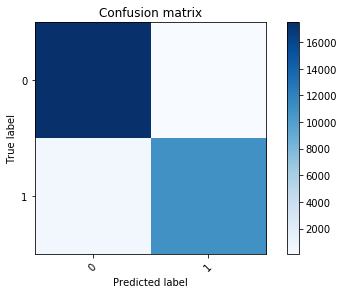

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17559
           1       0.99      0.95      0.97     11559

   micro avg       0.98      0.98      0.98     29118
   macro avg       0.98      0.97      0.98     29118
weighted avg       0.98      0.98      0.98     29118



In [118]:
cnn_model_1.load_weights('cnn_weights/best_weights_1.hdf5')

pred = cnn_model_1.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

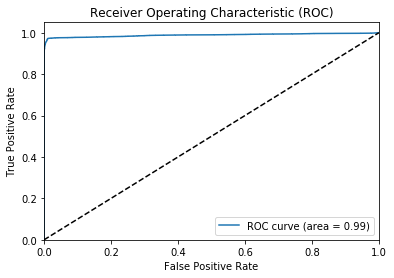

In [119]:
cnn_model_1.load_weights('cnn_weights/best_weights_1.hdf5')

pred = cnn_model_1.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [120]:
cnn_model_2 = Sequential()
cnn_model_2.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 2),activation='relu',input_shape=input_shape,padding='same'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_2.add(Conv2D(128, kernel_size=(1, 5), strides=(1, 2),activation='relu',padding='same'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(500, activation='tanh'))
cnn_model_2.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1, 59, 64)         384       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 15, 128)        41088     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_140 (Dense)            (None, 500)               512500    
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 1002      
Total para

In [122]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_2.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model_2.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 46s - loss: 0.1029 - val_loss: 0.0821
Epoch 2/1000
 - 45s - loss: 0.0540 - val_loss: 0.0728
Epoch 3/1000
 - 44s - loss: 0.0403 - val_loss: 0.0611
Epoch 4/1000
 - 45s - loss: 0.0384 - val_loss: 0.0538
Epoch 5/1000
 - 45s - loss: 0.0380 - val_loss: 0.0676
Epoch 6/1000
 - 45s - loss: 0.0350 - val_loss: 0.0553
Epoch 00006: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 47s - loss: 0.0326 - val_loss: 0.0424
Epoch 2/1000
 - 45s - loss: 0.0302 - val_loss: 0.0365
Epoch 3/1000
 - 44s - loss: 0.0241 - val_loss: 0.0687
Epoch 4/1000
 - 44s - loss: 0.0249 - val_loss: 0.0446
Epoch 00004: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 46s - loss: 0.0249 - val_loss: 0.0275
Epoch 2/1000
 - 45s - loss: 0.0183 - val_loss: 0.0225
Epoch 3/1000
 - 44s - loss: 0.0154 - val_loss: 0.0320
Epoch 4/1000
 - 45s - loss: 0.0158 - val_loss: 0.0155
Epoch 5/1000
 - 44s - loss: 0.0130 - v

Precision score: 0.9936796536796537
Recall score: 0.992905960723246
F1 score: 0.9932926565407417

[[17486    73]
 [   82 11477]]

Plotting confusion matrix


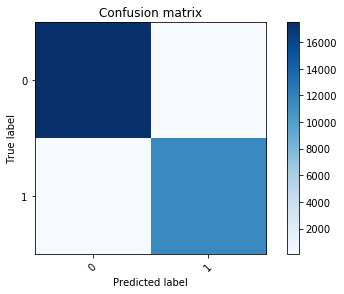

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       0.99      0.99      0.99     11559

   micro avg       0.99      0.99      0.99     29118
   macro avg       0.99      0.99      0.99     29118
weighted avg       0.99      0.99      0.99     29118



In [123]:
cnn_model_2.load_weights('cnn_weights/best_weights_2.hdf5')

pred = cnn_model_2.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(f1_score))


print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

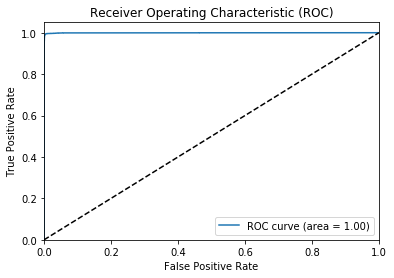

In [124]:
cnn_model_2.load_weights('cnn_weights/best_weights_2.hdf5')

pred = cnn_model_2.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [125]:
cnn_model_3 = Sequential()
cnn_model_3.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 2),activation='relu',input_shape=input_shape,padding='same'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_3.add(Conv2D(128, kernel_size=(1, 3), strides=(1, 2),activation='relu',padding='same'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(500, activation='relu'))
cnn_model_3.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 59, 64)         256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 15, 128)        24704     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 8, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 500)               512500    
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 1002      
Total para

In [126]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights_3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_3.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model_3.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 52s - loss: 0.1717 - val_loss: 0.0953
Epoch 2/1000
 - 48s - loss: 0.0603 - val_loss: 0.0697
Epoch 3/1000
 - 50s - loss: 0.0504 - val_loss: 0.0615
Epoch 4/1000
 - 49s - loss: 0.0421 - val_loss: 0.0588
Epoch 5/1000
 - 49s - loss: 0.0374 - val_loss: 0.0585
Epoch 6/1000
 - 50s - loss: 0.0337 - val_loss: 0.0456
Epoch 7/1000
 - 50s - loss: 0.0315 - val_loss: 0.0447
Epoch 8/1000
 - 53s - loss: 0.0279 - val_loss: 0.0363
Epoch 9/1000
 - 50s - loss: 0.0566 - val_loss: 0.0403
Epoch 10/1000
 - 51s - loss: 0.0246 - val_loss: 0.0412
Epoch 00010: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 53s - loss: 0.0253 - val_loss: 0.0337
Epoch 2/1000
 - 51s - loss: 0.0292 - val_loss: 0.0260
Epoch 3/1000
 - 50s - loss: 0.0239 - val_loss: 0.0241
Epoch 4/1000
 - 51s - loss: 0.0143 - val_loss: 0.0263
Epoch 5/1000
 - 51s - loss: 0.0127 - val_loss: 0.0179
Epoch 6/1000
 - 51s - loss: 0.0107 - val_loss: 0.0157
Epoch 7

Precision score: 0.9963636363636363
Recall score: 0.9955878536205555
F1 score: 0.9959755939244451

[[17517    42]
 [   51 11508]]

Plotting confusion matrix


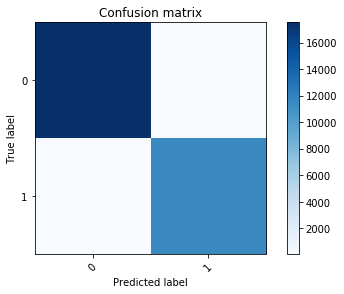

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      1.00      1.00     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [127]:
cnn_model_3.load_weights('cnn_weights/best_weights_3.hdf5')

pred = cnn_model_3.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(f1_score))


print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

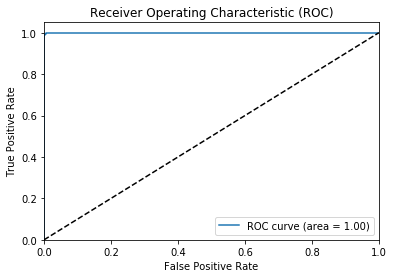

In [128]:
cnn_model_3.load_weights('cnn_weights/best_weights_3.hdf5')

pred = cnn_model_3.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [129]:
cnn_model_4 = Sequential()
cnn_model_4.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 2),activation='tanh',input_shape=input_shape,padding='same'))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_4.add(Conv2D(100, kernel_size=(1, 3), strides=(1, 2),activation='tanh',padding='same'))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(500, activation='tanh'))
cnn_model_4.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 1, 59, 64)         256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 30, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 15, 100)        19300     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 8, 100)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 500)               400500    
_________________________________________________________________
dense_145 (Dense)            (None, 2)                 1002      
Total para

In [131]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights_4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_4.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model_4.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 54s - loss: 0.0382 - val_loss: 0.0408
Epoch 2/1000
 - 51s - loss: 0.0278 - val_loss: 0.0398
Epoch 3/1000
 - 52s - loss: 0.0252 - val_loss: 0.0358
Epoch 4/1000
 - 49s - loss: 0.0226 - val_loss: 0.0364
Epoch 5/1000
 - 53s - loss: 0.0287 - val_loss: 0.0529
Epoch 00005: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 52s - loss: 0.0263 - val_loss: 0.0326
Epoch 2/1000
 - 50s - loss: 0.0192 - val_loss: 0.0314
Epoch 3/1000
 - 50s - loss: 0.0221 - val_loss: 0.0384
Epoch 4/1000
 - 50s - loss: 0.0215 - val_loss: 0.0357
Epoch 00004: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 53s - loss: 0.0202 - val_loss: 0.0420
Epoch 2/1000
 - 50s - loss: 0.0191 - val_loss: 0.0356
Epoch 3/1000
 - 49s - loss: 0.0165 - val_loss: 0.0333
Epoch 4/1000
 - 49s - loss: 0.0183 - val_loss: 0.0412
Epoch 5/1000
 - 51s - loss: 0.0191 - val_loss: 0.0293
Epoch 6/1000
 - 49s - loss: 0.0153 - v

Precision score: 0.9956642386403053
Recall score: 0.9933385240937798
F1 score: 0.9945000216534581

[[17509    50]
 [   77 11482]]

Plotting confusion matrix


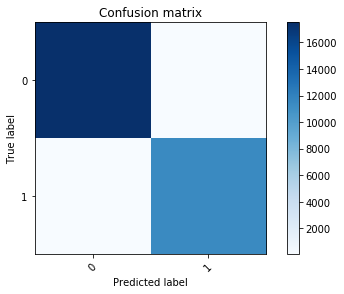

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       1.00      0.99      0.99     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [132]:
cnn_model_4.load_weights('cnn_weights/best_weights_4.hdf5')

pred = cnn_model_4.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(f1_score))


print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

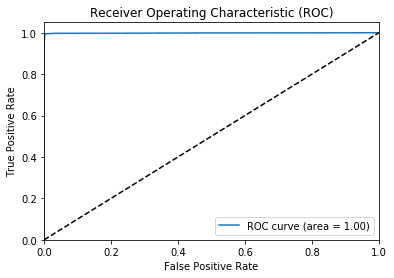

In [133]:
cnn_model_4.load_weights('cnn_weights/best_weights_4.hdf5')

pred = cnn_model_4.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

In [134]:
cnn_model_5 = Sequential()
cnn_model_5.add(Conv2D(64, kernel_size=(1, 5), strides=(1, 2),activation='relu',input_shape=input_shape,padding='same'))
cnn_model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_5.add(Conv2D(128, kernel_size=(1, 5), strides=(1, 2),activation='relu',padding='same'))
cnn_model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_5.add(Conv2D(256, kernel_size=(1, 5), strides=(1, 2),activation='relu',padding='same'))
cnn_model_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_5.add(Flatten())
cnn_model_5.add(Dense(500, activation='relu'))
cnn_model_5.add(Dense(y_tns_train.shape[1], activation='softmax'))
cnn_model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 1, 59, 64)         384       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 30, 64)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 15, 128)        41088     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 8, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 1, 4, 256)         164096    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 2, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
__________

In [135]:
checkpointer = ModelCheckpoint(filepath="cnn_weights/best_weights_5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)   
    cnn_model_5.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    cnn_model_5.fit(X_tns_re_train[:5000], y_tns_train[:5000],batch_size=128,validation_data=(X_tns_re_test[:1000],y_tns_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 51s - loss: 0.1664 - val_loss: 0.0767
Epoch 2/1000
 - 47s - loss: 0.0513 - val_loss: 0.0853
Epoch 3/1000
 - 49s - loss: 0.0405 - val_loss: 0.0595
Epoch 4/1000
 - 47s - loss: 0.0394 - val_loss: 0.0543
Epoch 5/1000
 - 49s - loss: 0.0407 - val_loss: 0.0581
Epoch 6/1000
 - 48s - loss: 0.0306 - val_loss: 0.0459
Epoch 7/1000
 - 48s - loss: 0.0312 - val_loss: 0.0562
Epoch 8/1000
 - 47s - loss: 0.0401 - val_loss: 0.0444
Epoch 9/1000
 - 48s - loss: 0.0360 - val_loss: 0.0438
Epoch 10/1000
 - 47s - loss: 0.0229 - val_loss: 0.0328
Epoch 11/1000
 - 47s - loss: 0.0196 - val_loss: 0.0407
Epoch 12/1000
 - 47s - loss: 0.0176 - val_loss: 0.0271
Epoch 13/1000
 - 49s - loss: 0.0140 - val_loss: 0.0257
Epoch 14/1000
 - 47s - loss: 0.0129 - val_loss: 0.0157
Epoch 15/1000
 - 48s - loss: 0.0158 - val_loss: 0.0162
Epoch 16/1000
 - 47s - loss: 0.0099 - val_loss: 0.0138
Epoch 17/1000
 - 49s - loss: 0.0087 - val_loss: 0.0137
Epoch 18/1000
 - 55s - l

Precision score: 0.9935199585277346
Recall score: 0.9948092395535946
F1 score: 0.9941641810400725

[[17484    75]
 [   60 11499]]

Plotting confusion matrix


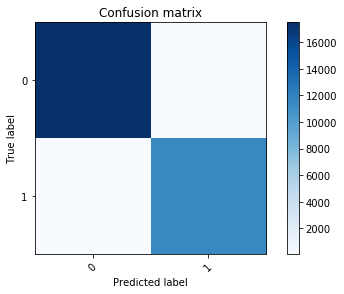

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17559
           1       0.99      0.99      0.99     11559

   micro avg       1.00      1.00      1.00     29118
   macro avg       1.00      1.00      1.00     29118
weighted avg       1.00      1.00      1.00     29118



In [136]:
cnn_model_5.load_weights('cnn_weights/best_weights_5.hdf5')

pred = cnn_model_5.predict(X_tns_re_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_tns_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(f1_score))


print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, clf_knn.classes_)
plt.show()

print(metrics.classification_report(y_true, pred))

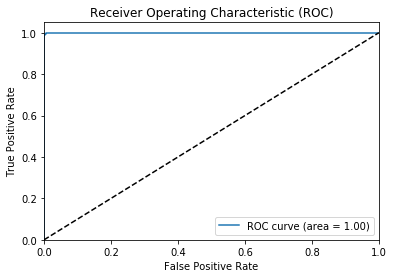

In [137]:
cnn_model_5.load_weights('cnn_weights/best_weights_5.hdf5')

pred = cnn_model_5.predict(X_tns_re_test)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)